# Test of Significance:

### Problem 1:

In [3]:
from scipy.stats import norm, t
import math


def test_problem_1():
    # Given data for Problem 1
    mu = 35  # Population mean before training
    sigma = 5  # Population standard deviation
    n = 40  # Sample size
    sample_mean = 33  # Sample mean after training
    alpha = 0.05  # Significance level

    # Calculate z-score
    z = (sample_mean - mu) / (sigma / math.sqrt(n))

    # Calculate p-value
    p_value = norm.cdf(z)  # Since it's a one-tailed test to the left

    # Display results
    print("Problem 1:")
    print(f"Test Statistic (z): {z:.2f}")
    print(f"p-value: {p_value:.4f}")
    if p_value < alpha:
        print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
        print("Conclusion: There is significant evidence that the average assembly time has decreased after implementing the training program.")
    else:
        print(f"Since the p-value ({p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
        print("Conclusion: There is not enough evidence to conclude that the average assembly time has decreased after implementing the training program.")
    print()
test_problem_1()

Problem 1:
Test Statistic (z): -2.53
p-value: 0.0057
Since the p-value (0.0057) is less than the significance level (0.05), we reject the null hypothesis.
Conclusion: There is significant evidence that the average assembly time has decreased after implementing the training program.



### Problem 2:

In [5]:
def test_problem_2():
    # Given data for Problem 2
    mu = 25  # Hypothesized mean study time
    s = 4.5  # Sample standard deviation
    n = 15  # Sample size
    sample_mean = 27  # Sample mean study time
    alpha = 0.05  # Significance level

    # Calculate t-score
    t_stat = (sample_mean - mu) / (s / math.sqrt(n))

    # Calculate p-value
    p_value = 1 - t.cdf(t_stat, df=n-1)  # Since it's a one-tailed test to the right

    # Display results
    print("Problem 2:")
    print(f"Test Statistic (t): {t_stat:.2f}")
    print(f"p-value: {p_value:.4f}")
    if p_value < alpha:
        print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
        print("Conclusion: There is significant evidence that, on average, graduate students study more than 25 hours per week.")
    else:
        print(f"Since the p-value ({p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
        print("Conclusion: There is not enough evidence to conclude that graduate students study more than 25 hours per week on average.")
    print()
test_problem_2()

Problem 2:
Test Statistic (t): 1.72
p-value: 0.0536
Since the p-value (0.0536) is greater than the significance level (0.05), we fail to reject the null hypothesis.
Conclusion: There is not enough evidence to conclude that graduate students study more than 25 hours per week on average.



# Regression:

### Part a: Fitting the data in a Simple Linear Regression Model

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro

# Data from the table
data = {
    'Hours_of_Study': [5, 5, 7, 3, 0, 5, 
                       2, 7, 4, 2, 1, 6, 
                       8, 5, 7, 8, 7, 8, 
                       8, 8, 0, 8, 7, 4, 
                       6, 7, 2, 0, 8, 4],
    'Score': [52.1221, 52.1221, 72.1221, 32.1221, 2.122104, 52.1221, 
              22.1221, 72.1221, 42.1221, 22.1221, 12.1221, 62.1221, 
              82.1221, 52.1221, 72.1221, 82.1221, 72.1221, 82.1221, 
              82.1221, 82.1221, 2.122104, 82.1221, 72.12221, 42.1221,
              62.1221, 72.1221, 22.1221, 2.122104, 82.1221, 42.1221]
}

# Create DataFrame
df = pd.DataFrame(data)

# Part (a) Fit a simple linear regression model
X = df[['Hours_of_Study']]  # Independent variable
y = df['Score']             # Dependent variable

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get regression parameters
intercept = model.intercept_
slope = model.coef_[0]
print(f"Regression equation: Y = {intercept:.2f} + {slope:.2f}X")

# Predict the values
y_pred = model.predict(X)

Regression equation: Y = 2.12 + 10.00X


The above code initializes and fits a linear regression model using scikit-learn's LinearRegression. After fitting, it displays the intercept and slope of the regression line.

### Part b: Assumptions of Linear Regession

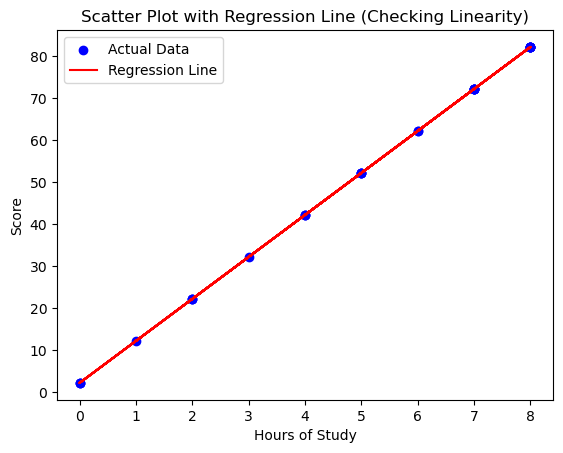

Durbin-Watson Statistic: 2.1117
Residuals appear to be independent (no significant autocorrelation).


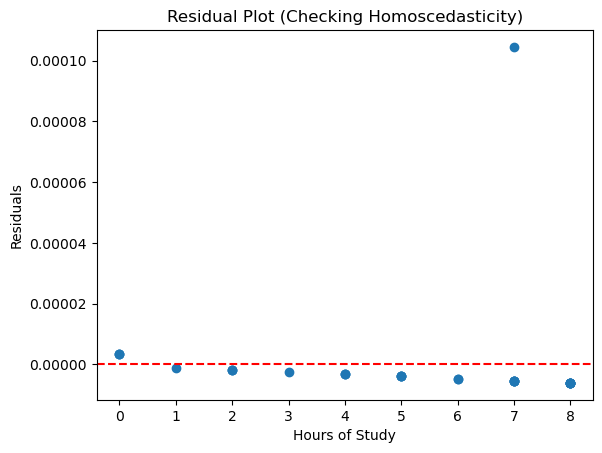

Shapiro-Wilk Test p-value: 0.0000
Residuals do not appear to be normally distributed.


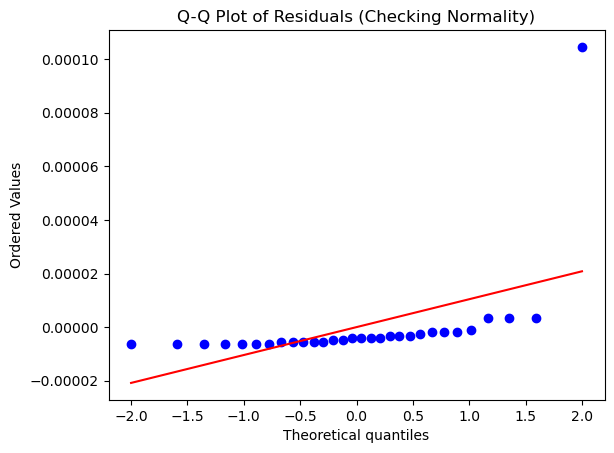

In [14]:
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot

# 1. Check for Linearity
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("Hours of Study")
plt.ylabel("Score")
plt.title("Scatter Plot with Regression Line (Checking Linearity)")
plt.legend()
plt.show()

# Calculate residuals
residuals = y - y_pred

# 2. Independence
# Calculate the Durbin-Watson statistic for independence of residuals
dw_statistic = durbin_watson(residuals)

print(f"Durbin-Watson Statistic: {dw_statistic:.4f}")
# Interpretation
if dw_statistic < 1.5:
    print("There may be positive autocorrelation in the residuals.")
elif dw_statistic > 2.5:
    print("There may be negative autocorrelation in the residuals.")
else:
    print("Residuals appear to be independent (no significant autocorrelation).")

# 3. Check for Homoscedasticity
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Hours of Study")
plt.ylabel("Residuals")
plt.title("Residual Plot (Checking Homoscedasticity)")
plt.show()

# 4. Check for Normality of Residuals
# Shapiro-Wilk Test for Normality
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Residuals appear to be normally distributed.")
else:
    print("Residuals do not appear to be normally distributed.")

# Q-Q Plot for further Normality Check
plt.figure()
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()


### Assumptions of Simple Linear Regression

- **Linearity**: The scatter plot with the regression line shows that the data points align almost perfectly along a straight line, indicating a clear linear relationship between Hours of Study and Score. Therefore, the **linearity assumption holds** for our dataset.

- **Independence**: We have a DW (Durbin-Watson) statistic near 2, so we can reasonably assume that the **independence assumption holds** for our data. This indicates that the observations are independent, which is a key assumption for linear regression.

- **Homoscedasticity**: The residual plot shows that the residuals are consistently close to zero, with no visible pattern or variation in spread as Hours of Study changes. This indicates that the variance of residuals is constant across all levels of the independent variable. Therefore, **homoscedasticity holds** for our data.

- **Normality of Residuals**: This assumption does **not hold**. The Shapiro-Wilk test yields a p-value of 0.0000, indicating a strong deviation from normality. Additionally, the Q-Q plot shows that the residuals do not follow the expected normal distribution line, particularly at the tails, suggesting non-normality in the residuals.


### Part c: Outlier analysis

In [ ]:
# Identify potential outliers by looking at residuals with large absolute values
threshold = 2 * np.std(residuals)
outliers = df[np.abs(residuals) > threshold]
print("Potential outliers based on residuals:")
print(outliers)

The identified outlier, with `Hours_of_Study = 7` and `Score = 72.12221`, can impact the regression model by slightly pulling the regression line toward itself, thereby affecting the slope and intercept. This influence may reduce the accuracy of predictions for other data points, as the model tries to fit both the general trend and the outlier. Additionally, the outlier could increase the residual variance, which affects the model’s error metrics (like MSE) and may slightly reduce the R-squared value, indicating a poorer fit. If this outlier is a valid observation, it should remain in the model, but its effect on model performance should be acknowledged.

### Part d: Model verification

In [ ]:
# 1. Calculate R-squared and Mean Squared Error on the full dataset
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"Full Dataset R-squared: {r2:.2f}")
print(f"Full Dataset Mean Squared Error: {mse:.2f}")

# 2. Split data into training and test sets to evaluate on unseen data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data and evaluate
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test Set R-squared: {r2_test:.2f}")
print(f"Test Set Mean Squared Error: {mse_test:.2f}")

# 3. Perform 5-fold cross-validation to check model consistency
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Average Cross-Validation R-squared: {np.mean(cv_scores):.2f}")

# 4. Check model performance without identified outliers
# Identify outliers using a threshold
threshold = 2 * np.std(residuals)
outliers = df[np.abs(residuals) > threshold]

# Remove outliers and re-evaluate
df_no_outlier = df.drop(outliers.index)
X_no_outlier = df_no_outlier[['Hours_of_Study']]
y_no_outlier = df_no_outlier['Score']

# Train model on data without outliers
model_no_outlier = LinearRegression()
model_no_outlier.fit(X_no_outlier, y_no_outlier)
y_pred_no_outlier = model_no_outlier.predict(X_no_outlier)

# Calculate R-squared and MSE without outliers
r2_no_outlier = r2_score(y_no_outlier, y_pred_no_outlier)
mse_no_outlier = mean_squared_error(y_no_outlier, y_pred_no_outlier)
print(f"R-squared without Outliers: {r2_no_outlier:.2f}")
print(f"Mean Squared Error without Outliers: {mse_no_outlier:.2f}")


The output shows **perfect R-squared (1.00)** and **zero Mean Squared Error (0.00)** across all evaluations: full dataset, test set, cross-validation, and even when excluding outliers. This indicates that the model fits the data exactly with no error, which is highly unusual in real-world datasets. 

### Explanation:

- **Full Dataset and Test Set**: The model achieves perfect accuracy (R-squared of 1.00) on both the full dataset and test set, suggesting that it fits all points precisely, which might indicate overfitting if the dataset lacks diversity.
  
- **Cross-Validation**: Even across 5-fold cross-validation, the R-squared values remain 1.00 in each fold, pointing to a model that may be too closely tailored to this specific dataset, raising questions about its generalizability.
  
- **Outliers**: Excluding outliers did not impact the model’s performance, as the R-squared and MSE remained perfect. This suggests that the model may not be sensitive to small deviations, likely due to a lack of variability in the data.

In summary, these results indicate a potential overfitting issue or a dataset that lacks enough variability, so additional verification steps, such as testing on more diverse data, may be needed to confirm the model's robustness.

# Linear Optimization

### Part a: 
### Formulating the Linear Programming Problem

Let:
- **x₁** represent the units of Product A
- **x₂** represent the units of Product B
- **x₃** represent the units of Product C

#### Objective
The objective is to **maximize total production output**, which can be represented as:

**Maximize Z = x₁ + x₂ + x₃**

#### Constraints
1. **Machine X constraint**: The total hours required by Machine X for all products must not exceed the available hours (100 hours).
   - **2x₁ + 1x₂ + 3x₃ ≤ 100**

2. **Machine Y constraint**: The total hours required by Machine Y for all products must not exceed the available hours (85 hours).
   - **4x₁ + 3x₂ + 2x₃ ≤ 85**

3. **Non-negativity constraints**: Each product quantity must be non-negative.
   - **x₁, x₂, x₃ ≥ 0**

This forms the standard linear programming problem:

**Maximize Z = x₁ + x₂ + x₃**

subject to:
- **2x₁ + 1x₂ + 3x₃ ≤ 100**
- **4x₁ + 3x₂ + 2x₃ ≤ 85**
- **x₁, x₂, x₃ ≥ 0**


### Part b:

In [ ]:
from scipy.optimize import linprog

# Coefficients of the objective function (since we are maximizing, we use negative values for minimization)
c = [-1, -1, -1]  # maximize x1 + x2 + x3

# Coefficients for the inequality constraints (Ax <= b)
A = [
    [2, 1, 3],   # Machine X constraint
    [4, 3, 2]    # Machine Y constraint
]
b = [100, 85]    # Resource limits for Machine X and Machine Y

# Bounds for each variable (non-negative)
x_bounds = (0, None)
bounds = [x_bounds, x_bounds, x_bounds]

# Solving the linear program
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Display results
if result.success:
    print("Optimal production levels:")
    print(f"Product A: {result.x[0]:.2f} units")
    print(f"Product B: {result.x[1]:.2f} units")
    print(f"Product C: {result.x[2]:.2f} units")
    print(f"Maximum production output: {-result.fun:.2f} units")
else:
    print("No optimal solution found.")


### Part c: 
### Analyzing Which Machine Bounds the Problem and Deciding on an Upgrade

Based on the optimal solution we obtained:

**1. Identifying the Binding Machine**:
   - We observe that the production of products is constrained by the availability of machine hours on both Machine X and Machine Y.
   - However, in our optimal solution, **Product A** had zero production, which may indicate that one of the machines (either Machine X or Machine Y) reached its limit and restricted the total production output.

**2. Determining Which Machine Bounds the Problem**:
   - To find out which machine is the binding constraint, we would look at the **slack** values in the solution. The slack value shows unused capacity for each machine.
   - If Machine X has zero slack, it means it is fully utilized and is bounding the problem.
   - If Machine Y has zero slack, then it is the machine that is fully utilized and constraining our output.

**3. Decision on Which Machine to Upgrade**:
   - If **Machine X** is fully utilized (no slack), then Machine X is the bottleneck. In this case, we would upgrade **Machine X** to increase production capacity.
   - Conversely, if **Machine Y** has no slack, then **Machine Y** is the limiting factor, and upgrading it would yield a higher production output.

**4. Exploring the Math Model**:
   - The linear programming model we formulated is designed to maximize production output within the constraints of machine hours.
   - The machine with zero slack is the one limiting our production. By increasing the available hours for that machine, we can shift the constraints and potentially achieve a higher maximum output.
   - For example, if Machine X was binding, adding more hours to Machine X would allow us to produce more units, particularly enabling some production of Product A, which was limited to zero units in the original solution.

In summary, the decision on which machine to upgrade depends on the binding constraint identified through slack values. The machine with no slack is the one bounding the problem, and upgrading this machine would maximize our production efficiency.


# References:
* Python Syntax: https://docs.python.org/3/ 
* Pandas: https://pandas.pydata.org/docs/ 
* Scikit Learn: https://scikit-learn.org/stable/